In [5]:
import pandas as pd

dfCases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
dfTrack = pd.read_csv("https://api.vitaldb.net/trks")  # track list
dflabs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# A1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def a1():
    #create a new column 'op_duration' which is the difference between 'opend' and 'opstart'
    dfCases["op_duration"] = dfCases["opend"] - dfCases["opstart"]
    threshold_minutes = 240*60
    #create a new column 'surgery_duration_class' which is 'long' if 'op_duration' is greater than 'threshold_minutes' else 'short'
    dfCases['surgery_duration_class'] = dfCases['op_duration'].apply(lambda x: 'long' if x > threshold_minutes else 'short')
    X = dfCases[['opstart', 'opend', 'op_duration']]
    y = dfCases['surgery_duration_class']
    #split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    #create a KNeighborsClassifier object
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    y_train_pred = neigh.predict(X_train)
    y_test_pred = neigh.predict(X_test)
    #calculate the confusion matrix for training and testing sets
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    #calculate the precision, recall, and f1 score for training and testing sets
    precision_train = precision_score(y_train, y_train_pred, pos_label='long')
    recall_train = recall_score(y_train, y_train_pred, pos_label='long')
    f1_train = f1_score(y_train, y_train_pred, pos_label='long')

    precision_test = precision_score(y_test, y_test_pred, pos_label='long')
    recall_test = recall_score(y_test, y_test_pred, pos_label='long')
    f1_test = f1_score(y_test, y_test_pred, pos_label='long')
    return conf_matrix_train, conf_matrix_test, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test


# A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. Analyse the results

In [21]:
def convert(Volume):
  if 'M' in Volume:
    return float(Volume.replace('M', '')) * 1000000
  elif 'K' in Volume:
    return float(Volume.replace('K', '')) * 1000
  

def a2():
    file = r"C:\Users\yogen\ML-LAB_S5\Lab Session Data.xlsx"
    dfA2 = pd.read_excel(file, sheet_name=1)
    dfA2.dropna()
    dfA2["Date"] = pd.to_datetime(dfA2["Date"])
    dfA2.set_index('Date', inplace=True)
    dfA2['Volume'] = dfA2['Volume'].apply(convert)
    X = dfA2[['Open', 'High', 'Low', 'Volume']]
    y = dfA2['Price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    #predict the price using the model
    y_pred = model.predict(X_test)
    #calculate the mean squared error, root mean squared error, mean absolute percentage error, and r2 score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mape, r2



#  Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class color. Observe the plot.


In [27]:
def a3():
    np.random.seed(290)
    X = np.random.uniform(1, 10, 20)
    Y = np.random.uniform(1, 10, 20)
    classes = np.where(X + Y > 10, 1, 0)
    colors = np.where(classes == 1, 'red', 'blue')
    plt.scatter(X, Y, c=colors, s=100, edgecolors='black')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Scatter Plot of Training Data')
    plt.show()
    train_data = pd.DataFrame({'X': X, 'Y': Y})
    train_data['Class'] = classes
    return train_data

# Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. This creates a test set of about 10,000 points. Classify these points with above training data using kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread and class boundary lines in the feature space.


In [22]:
def knn_classifier(train_data, k):
    
    x = np.arange(0, 10.1, 0.1)
    y = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(x, y)
    X_t_flat = X_test.flatten()
    Y_t_flat = Y_test.flatten()
    test_data = pd.DataFrame({'X': X_t_flat, 'Y': Y_t_flat})
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data[['X', 'Y']], train_data['Class'])
    test_data_np = np.array(test_data)
    
    y_test_pred = knn.predict(test_data_np)
    test_data['Prediction'] = y_test_pred
    test_data['Color'] = np.where(test_data['Prediction'] == 1, 'red', 'blue')


    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(test_data['X'], test_data['Y'], c=test_data['Prediction'], cmap='bwr', s=1)
    plt.title(f'kNN Classifier Predictions for k = {k}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(scatter, label='Class')
    plt.show()

#  Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

In [23]:
def a5(train_data):
    for i in range(1, 11):
        knn_classifier(train_data, i)

# 6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.


In [24]:
def a6():
    selected_features = dfCases[['height', 'weight']].dropna().sample(200, random_state=42)
    X_train = selected_features['height'].values
    Y_train = selected_features['weight'].values
    threshold = 230
    classes = np.where(X_train + Y_train > threshold, 1, 0)
    colors = np.where(classes == 1, 'red', 'blue')
    plt.scatter(X_train, Y_train, c=colors, s=100, edgecolors='black')
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.title('Scatter Plot of Training Data a6')
    plt.show()
    return selected_features, classes

def prereq():
    x_test = np.linspace(dfCases['height'].min(), dfCases['height'].max(), 50)
    y_test = np.linspace(dfCases['weight'].min(), dfCases['weight'].max(), 50)
    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_t_flat = X_test.flatten()
    Y_t_flat = Y_test.flatten()
    test_data = pd.DataFrame({'height': X_t_flat, 'weight': Y_t_flat})
    return test_data,X_t_flat,Y_t_flat

def knn_classifierA6(train_data, k):
    selected_features, classes = a6()
    test_data,X_t_flat,Y_t_flat = prereq()
    knn_proj_data = KNeighborsClassifier(n_neighbors=k)
    knn_proj_data.fit(train_data[['height', 'weight']], classes)

    test_data = pd.DataFrame({'height': X_t_flat, 'weight': Y_t_flat})


    y_test_pred = knn_proj_data.predict(test_data)
    test_data['Prediction'] = y_test_pred
    test_data['Color'] = np.where(test_data['Prediction'] == 1, 'red', 'blue')

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(test_data['height'], test_data['weight'], c=test_data['Prediction'], cmap='bwr', s=1)
    plt.title(f'kNN Classifier Predictions for k = {k}')
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.colorbar(scatter, label='Class')
    plt.show()

def a6f():
    selected_features = dfCases[['height', 'weight']].dropna().sample(200, random_state=42)
    for i in range(1, 11):
        knn_classifierA6(selected_features, i)








RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your kNN classifier. This is called hyper-parameter tuning

In [25]:
def a7RandomSearchCV():
    selected_features, classes = a6()
    param_dist = {
        'n_neighbors': randint(1, 21),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    knnRSCV = KNeighborsClassifier()

    random_search = RandomizedSearchCV(
        estimator=knnRSCV,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring='accuracy',
        random_state=42
    )

    random_search.fit(selected_features[['height', 'weight']], classes)
    print("Best parameters found: ", random_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


def a7grid_search():
    selected_features, classes = a6()
    param_grid = {
        'n_neighbors': list(range(1, 21)),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
        }
    knnGSCV = KNeighborsClassifier()
    grid_search = GridSearchCV(
        estimator=knnGSCV,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(selected_features[['height', 'weight']], classes)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Confusion Matrix (Training):
 [[ 640    1]
 [   1 3829]]
Confusion Matrix (Testing):
 [[ 263    3]
 [   0 1651]]
Precision (Training): 0.9984399375975039
Recall (Training): 0.9984399375975039
F1 Score (Training): 0.9984399375975039
Precision (Testing): 1.0
Recall (Testing): 0.9887218045112782
F1 Score (Testing): 0.9943289224952742
Mean Squared Error: 809.4623103649865
Root Mean Squared Error: 28.451051129351733
Mean Absolute Percentage Error: 0.01035704837454903
R2 Score: 0.9879339446644937


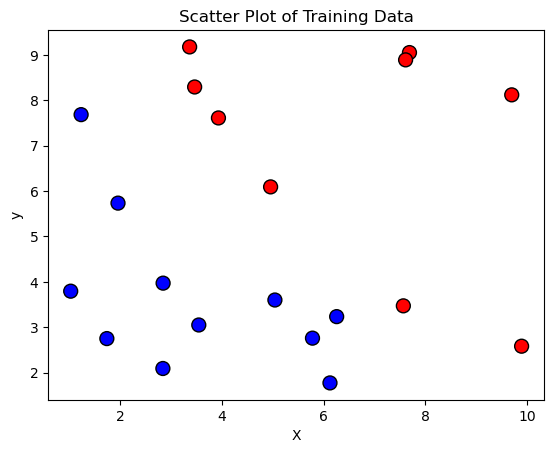

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


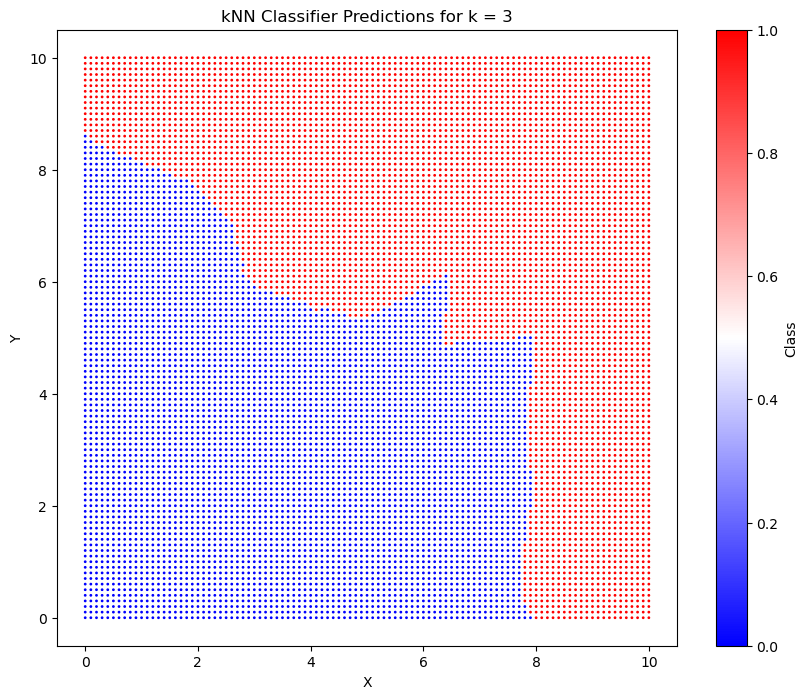

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


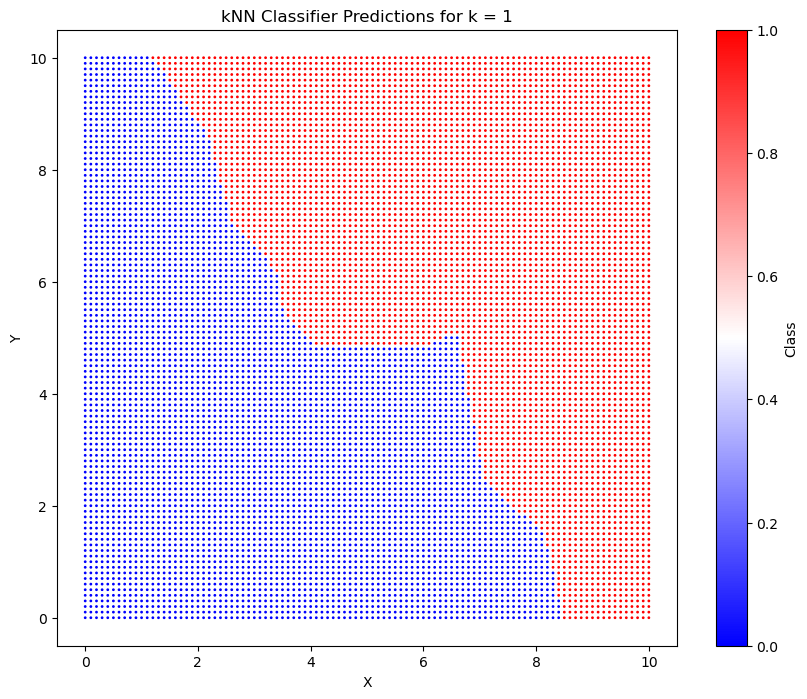

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


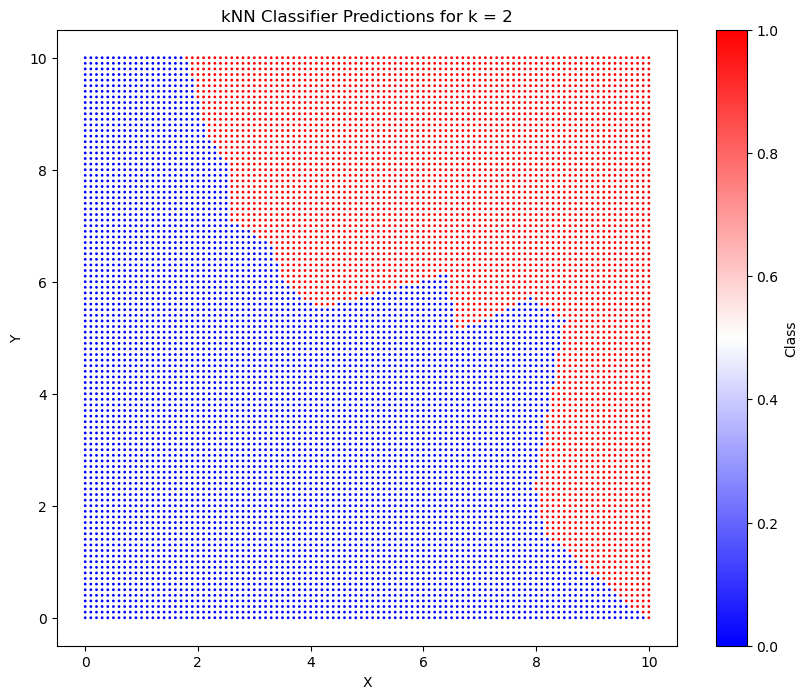

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


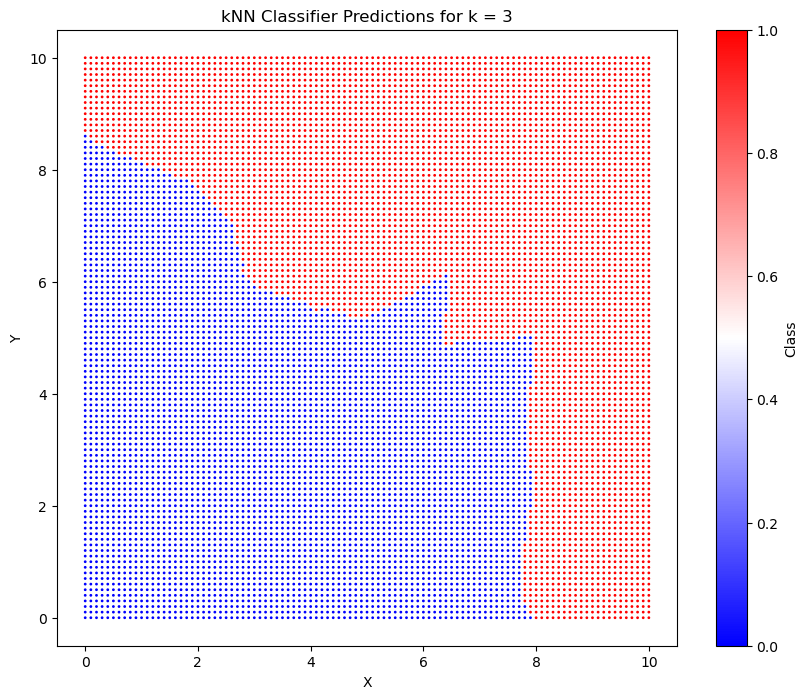

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


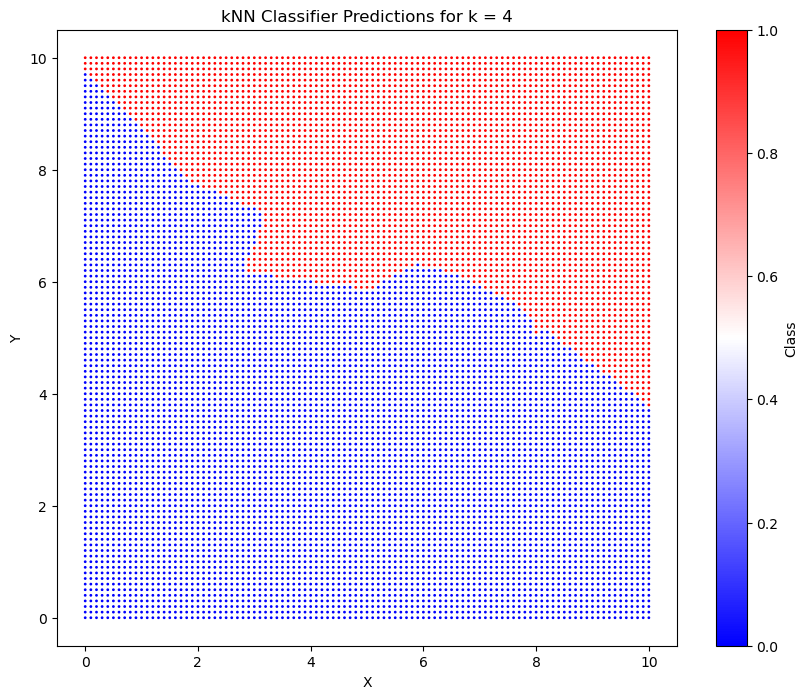

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


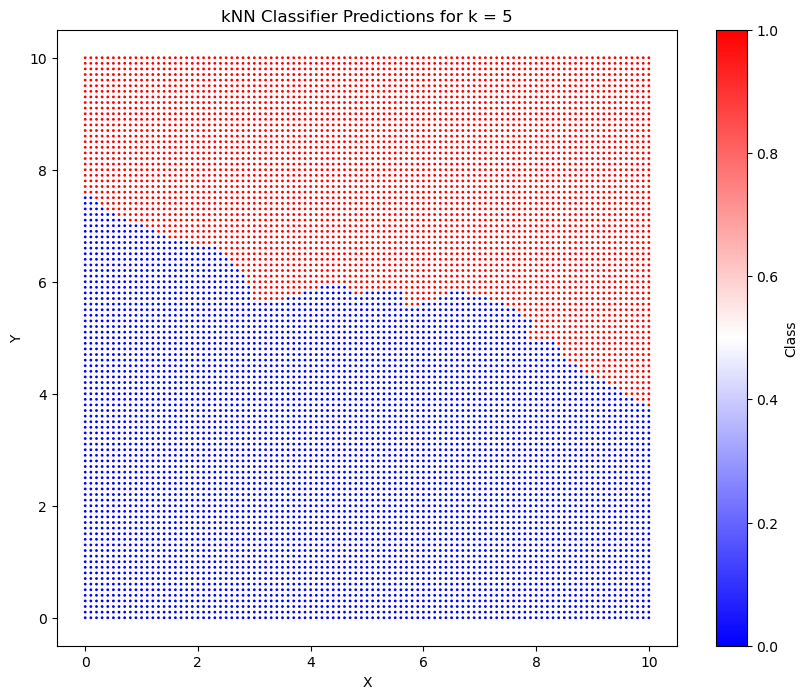

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


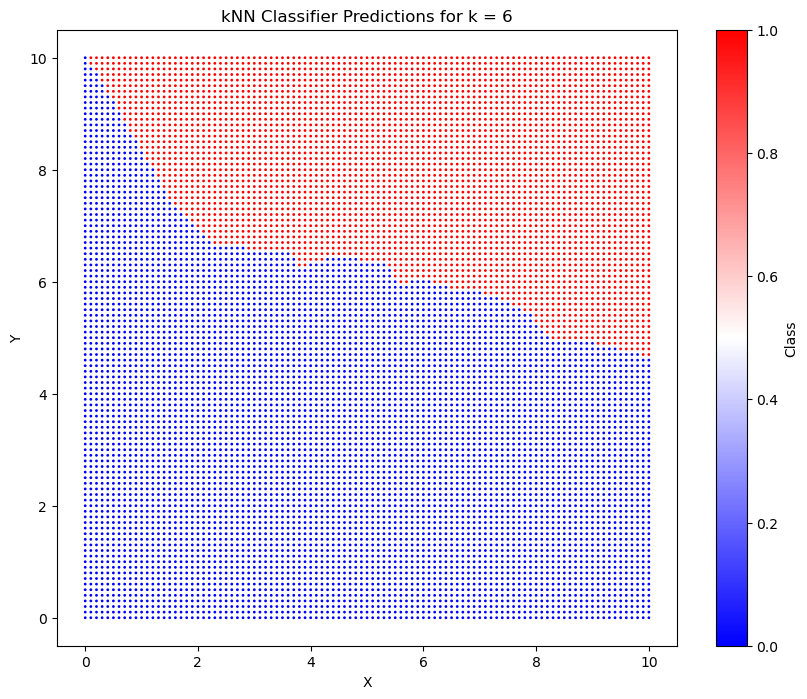

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


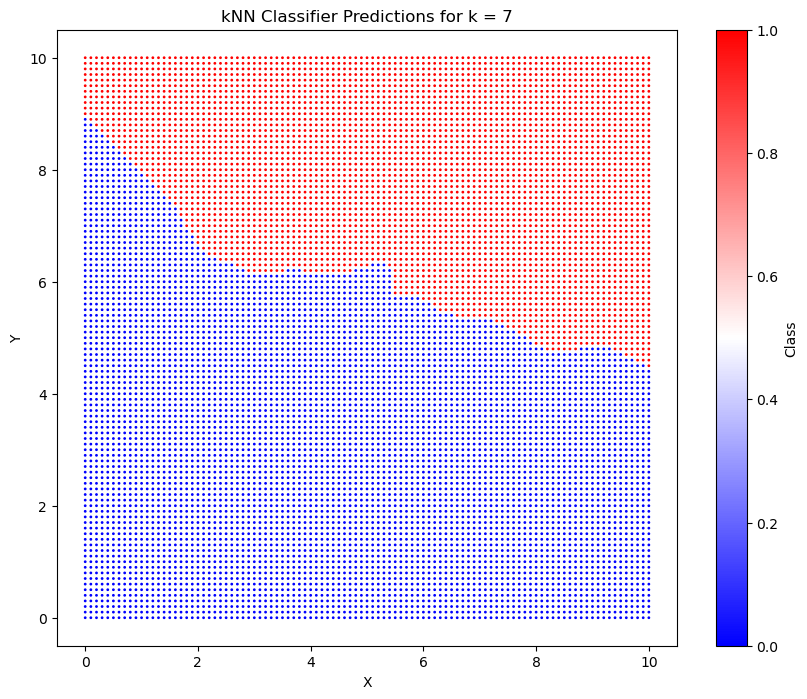

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


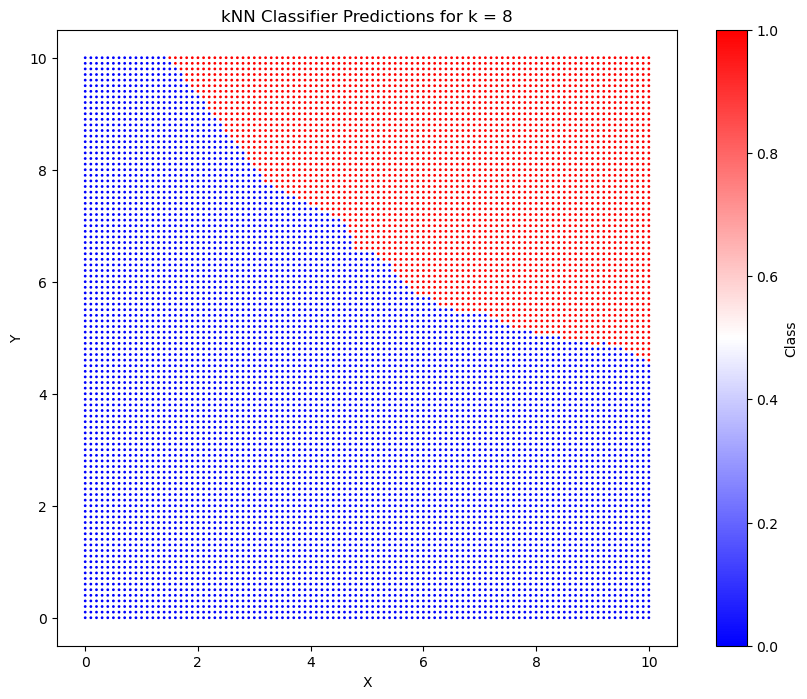

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


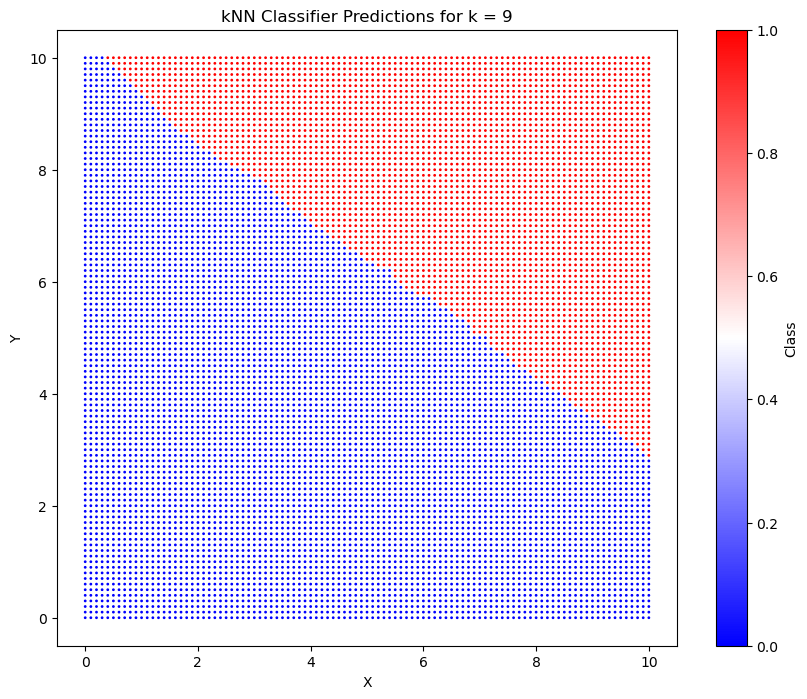

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


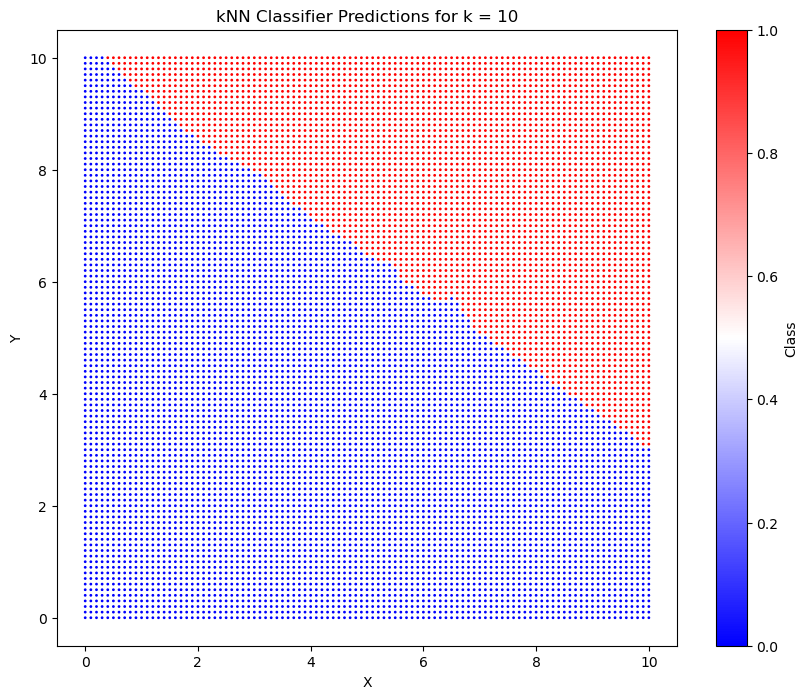

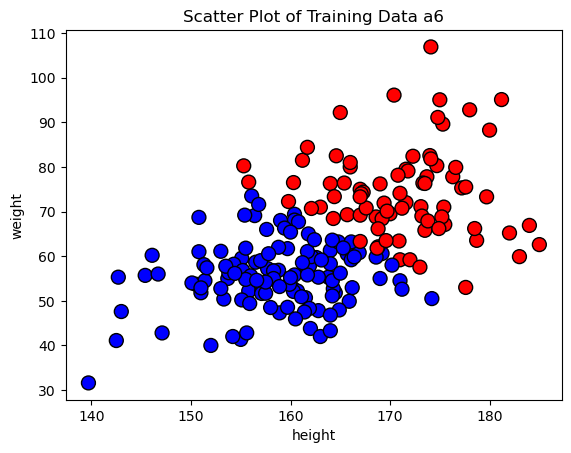

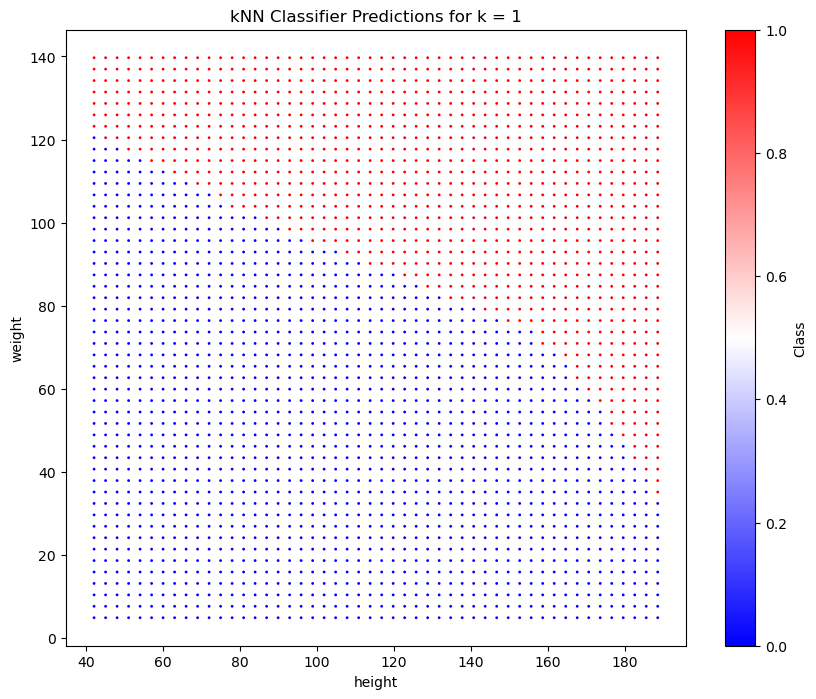

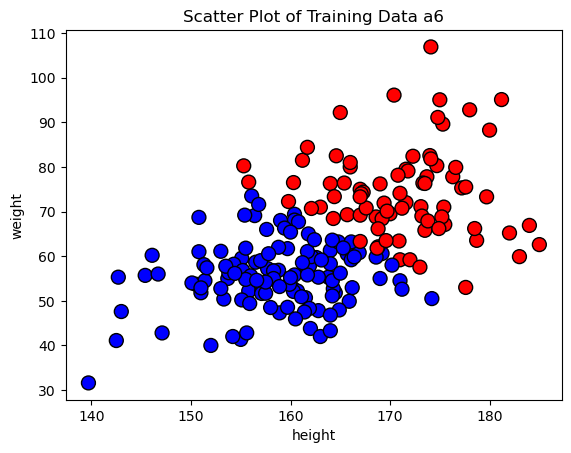

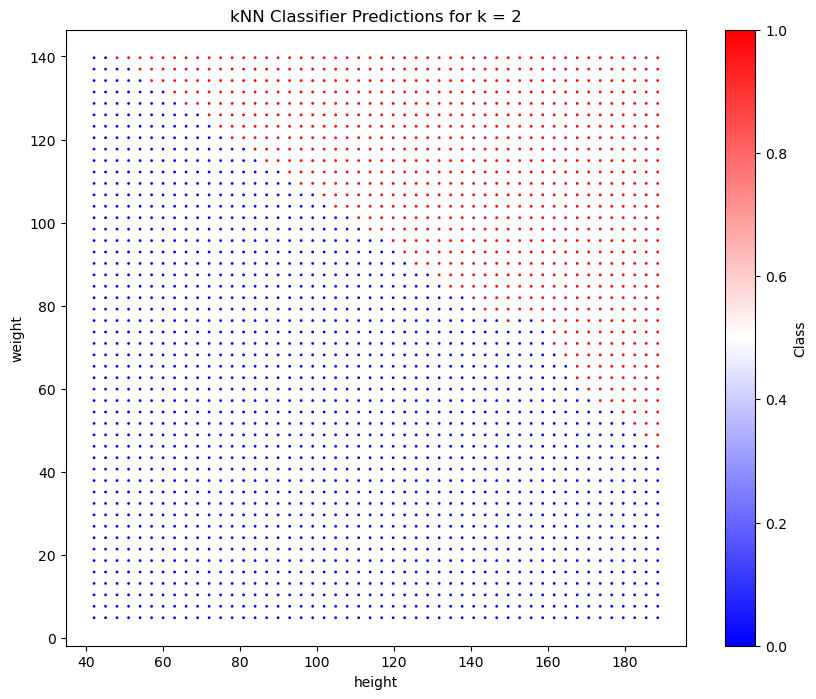

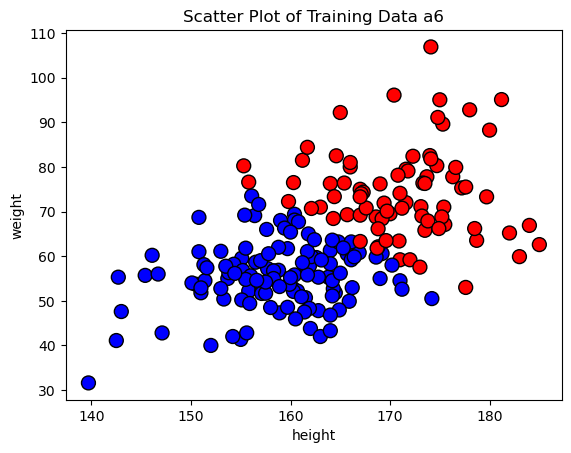

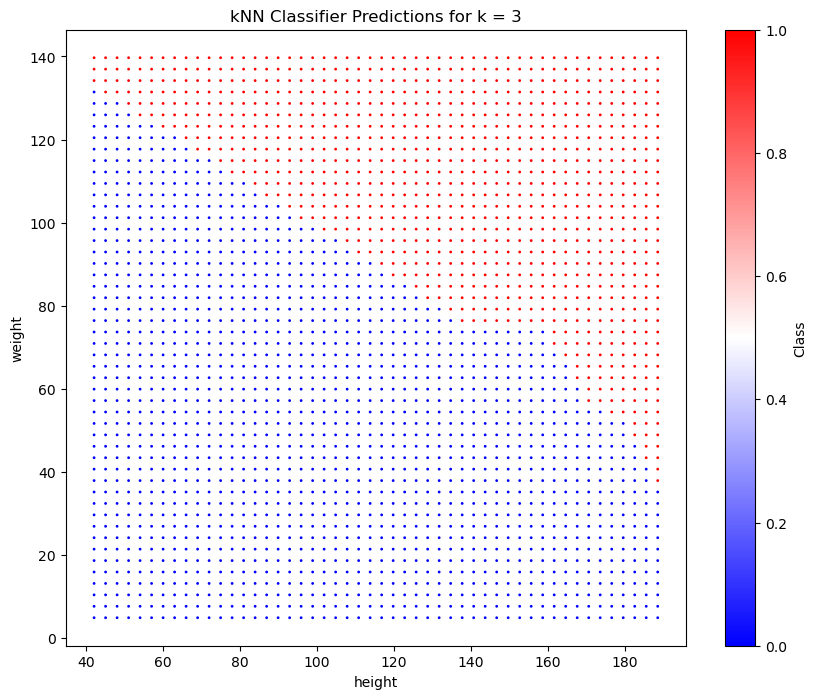

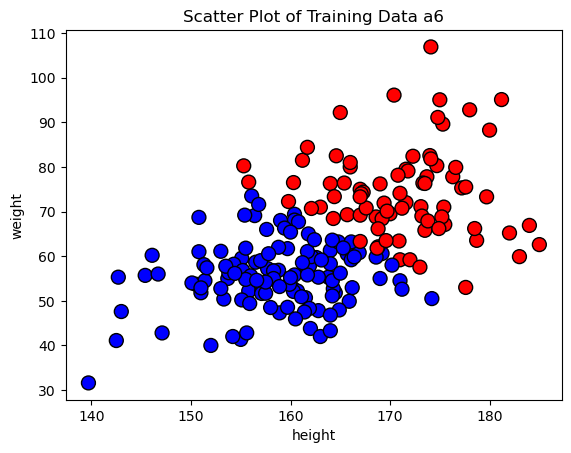

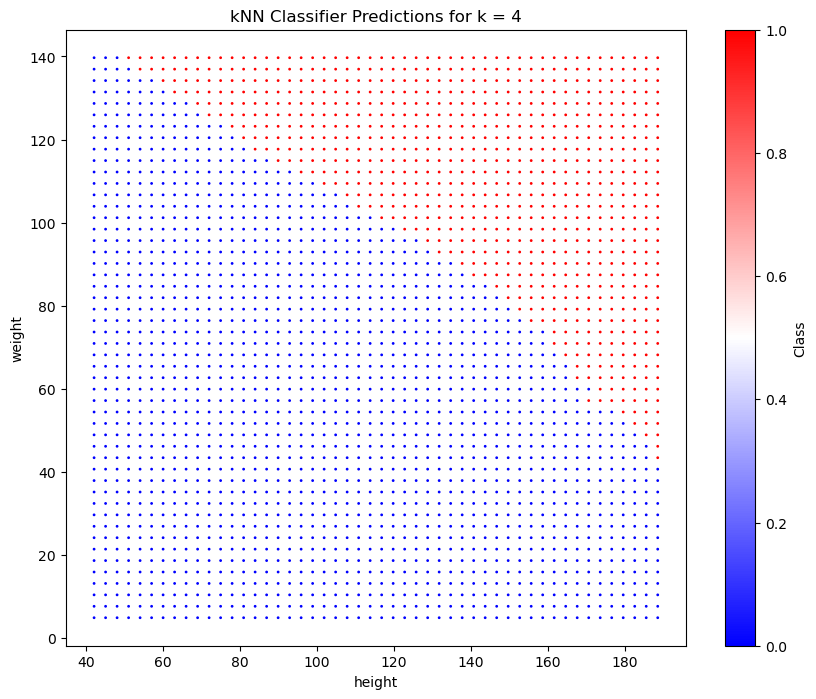

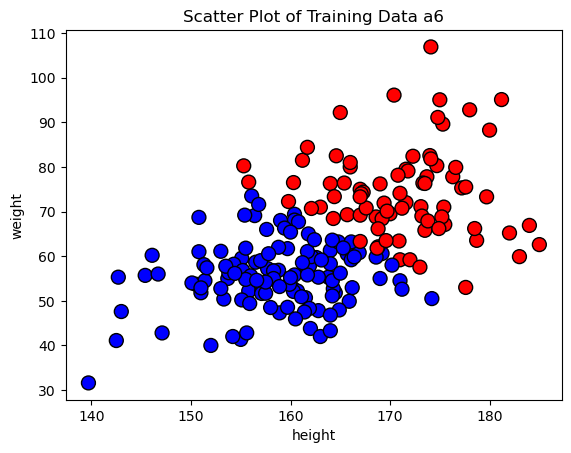

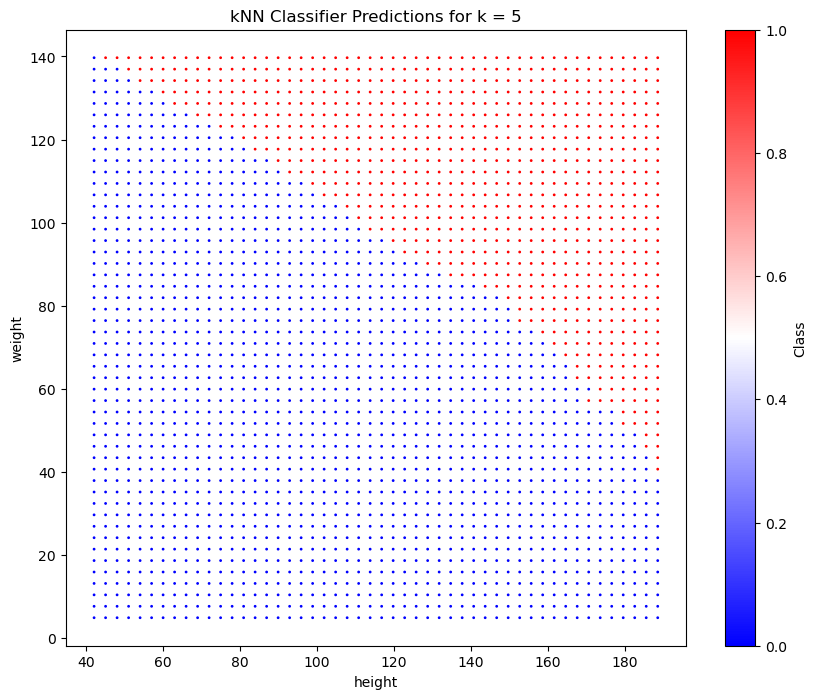

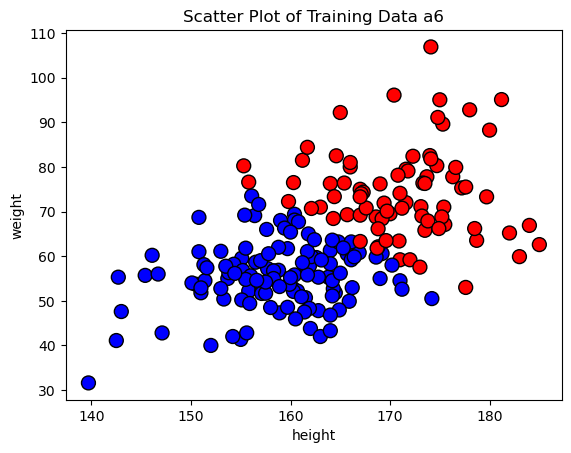

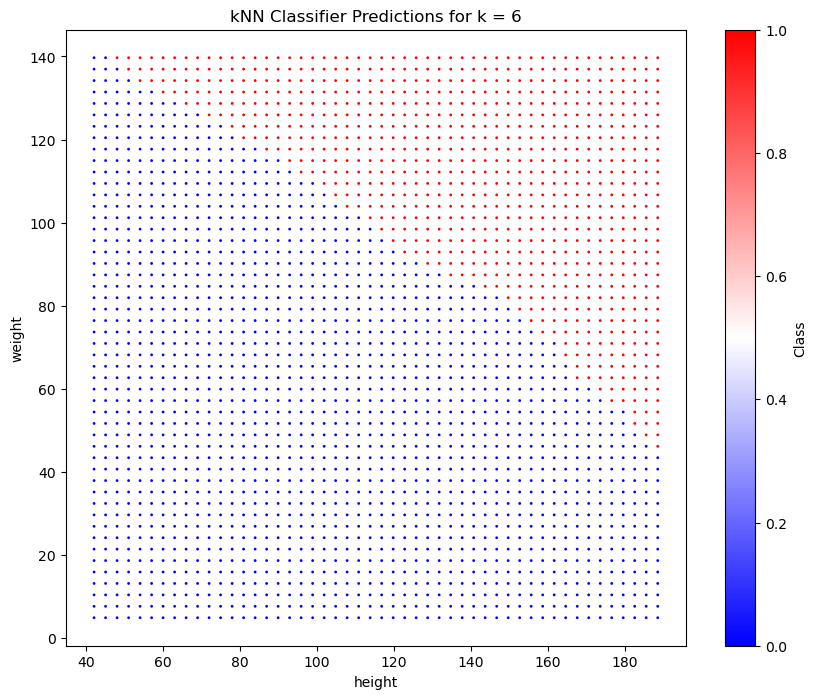

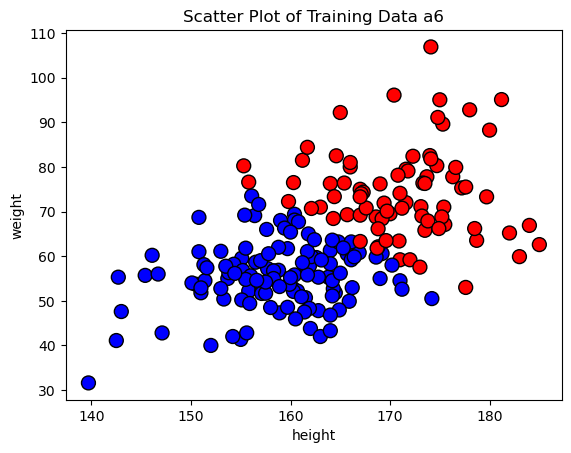

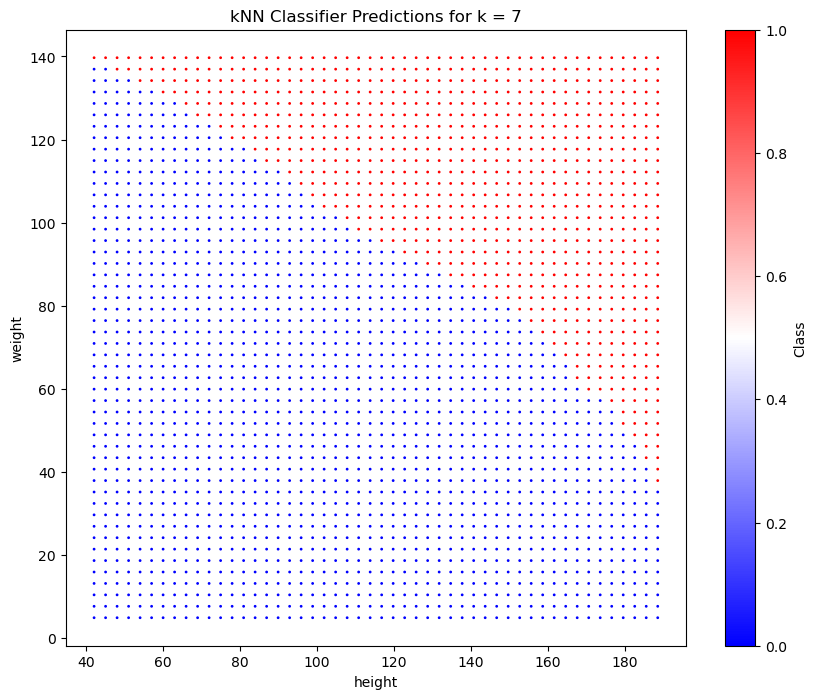

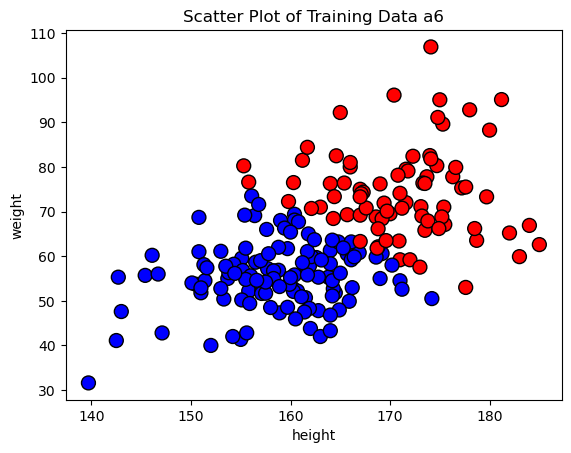

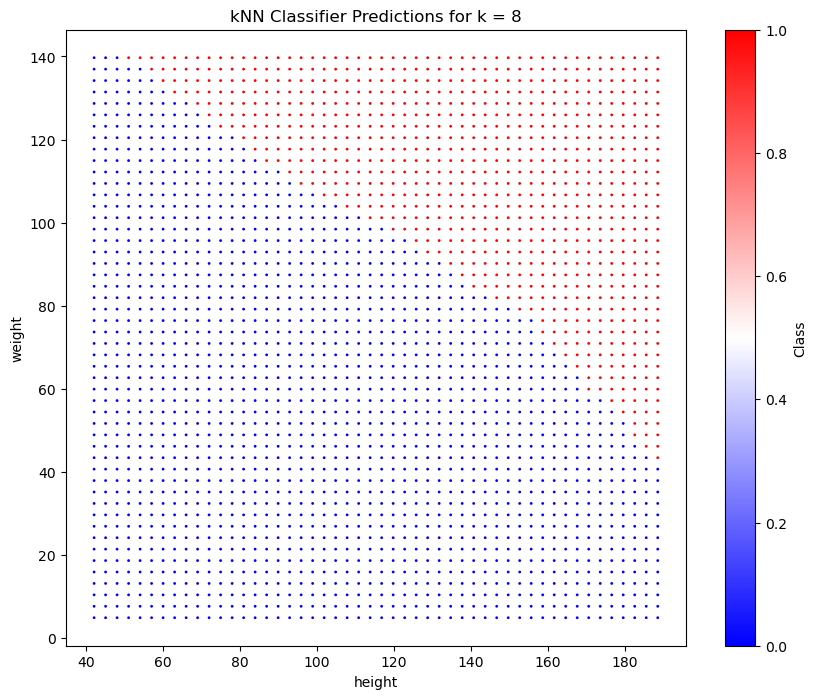

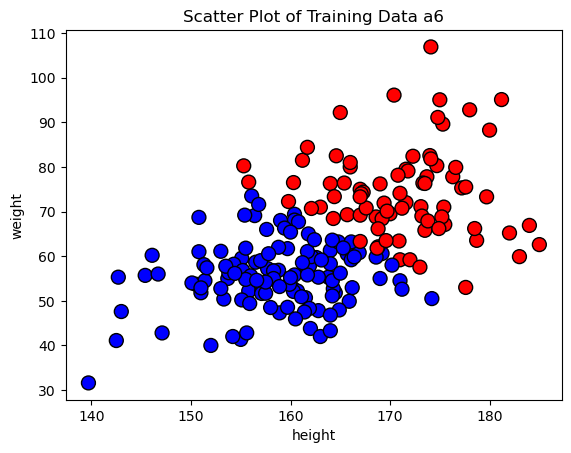

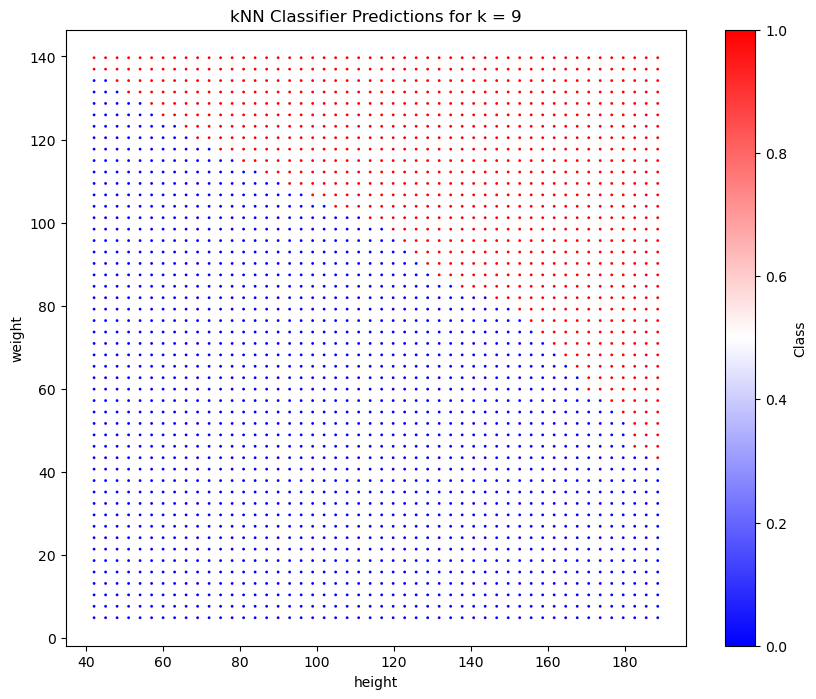

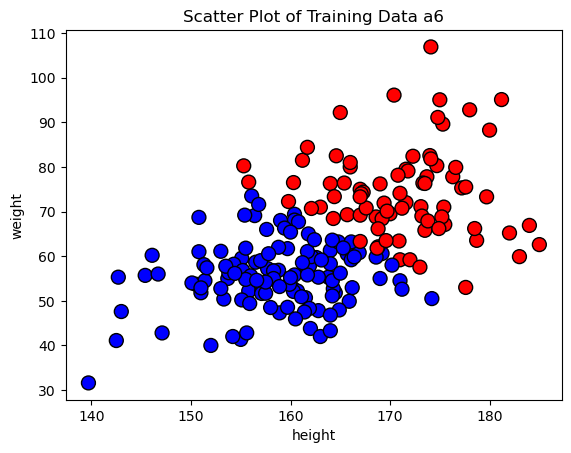

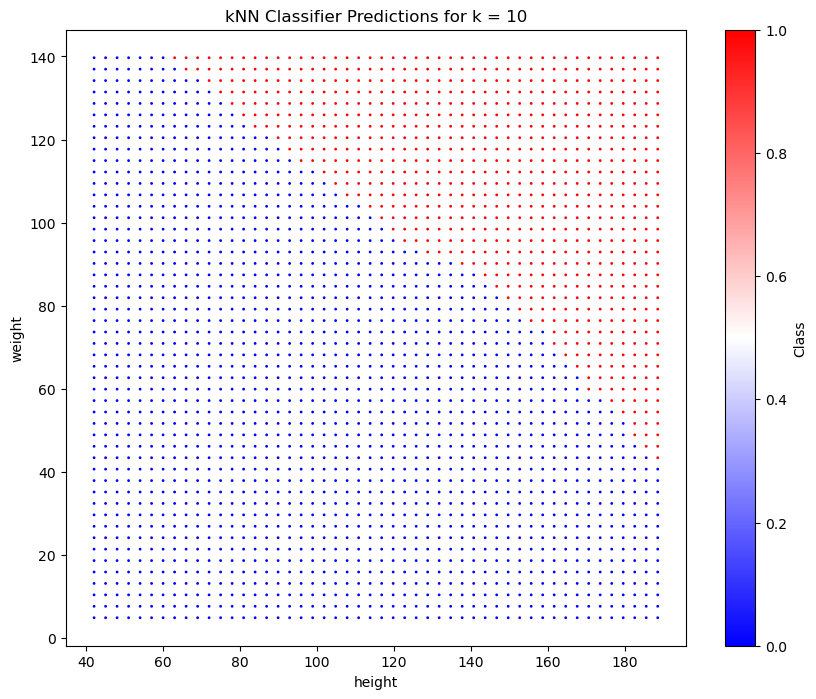

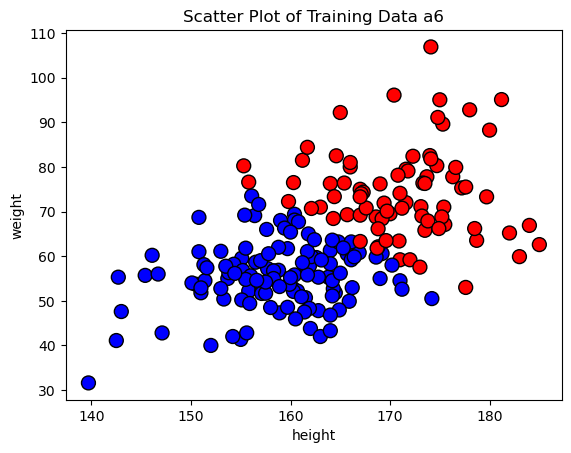

Best parameters found:  {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Best cross-validation score: 0.97


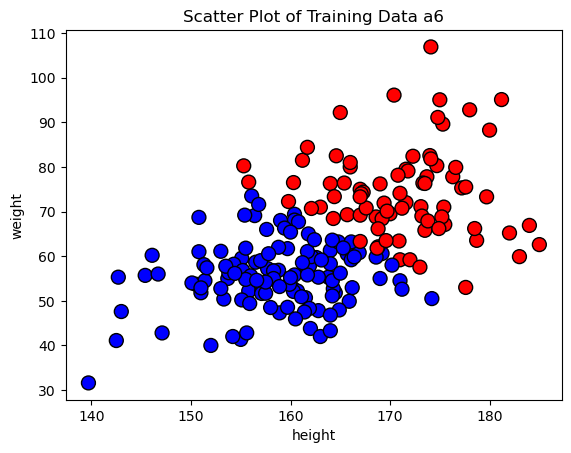

Best parameters found:  {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Best cross-validation score: 0.97


In [28]:
def main():
    # A1
    conf_matrix_train, conf_matrix_test, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test = a1()
    print("Confusion Matrix (Training):\n", conf_matrix_train)
    print("Confusion Matrix (Testing):\n", conf_matrix_test)
    print("Precision (Training):", precision_train)
    print("Recall (Training):", recall_train)
    print("F1 Score (Training):", f1_train)
    print("Precision (Testing):", precision_test)
    print("Recall (Testing):", recall_test)
    print("F1 Score (Testing):", f1_test)

    # A2
    mse, rmse, mape, r2 = a2()
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Percentage Error:", mape)
    print("R2 Score:", r2)

    # A3
    training_data = a3()
  

    # A4
    knn_classifier(training_data, 3)
    # A5
    a5(training_data)

    

    # A6
    a6f()

    # A7
    a7RandomSearchCV()
    a7grid_search()

if __name__ == "__main__":
    main()